In [1]:
import pandas as pd
import numpy as np

In [2]:
sf_permits = pd.read_csv("../dataset/building-permit-applications-data/Building_Permits.csv")

/home/neil/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = sf_permits[['Current Status','Filed Date','Issued Date','Zipcode','Supervisor District','Permit Type']]

In [47]:
sf_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

In [5]:
zips = pd.get_dummies( df['Zipcode'] , prefix = 'z' )

In [6]:
df=pd.concat([df, zips], axis=1)
sds = pd.get_dummies( df['Supervisor District'] , prefix = 'sd' )
df=pd.concat([df, sds], axis=1)
df=df.drop(columns=['Zipcode','Supervisor District'])
pts = pd.get_dummies( df['Permit Type'] , prefix = 'pt' )
df=pd.concat([df, pts], axis=1)
df=df.drop(columns=['Permit Type'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 49 columns):
Current Status    198900 non-null object
Filed Date        198900 non-null object
Issued Date       183960 non-null object
z_94102.0         198900 non-null uint8
z_94103.0         198900 non-null uint8
z_94104.0         198900 non-null uint8
z_94105.0         198900 non-null uint8
z_94107.0         198900 non-null uint8
z_94108.0         198900 non-null uint8
z_94109.0         198900 non-null uint8
z_94110.0         198900 non-null uint8
z_94111.0         198900 non-null uint8
z_94112.0         198900 non-null uint8
z_94114.0         198900 non-null uint8
z_94115.0         198900 non-null uint8
z_94116.0         198900 non-null uint8
z_94117.0         198900 non-null uint8
z_94118.0         198900 non-null uint8
z_94121.0         198900 non-null uint8
z_94122.0         198900 non-null uint8
z_94123.0         198900 non-null uint8
z_94124.0         198900 non-null uint8
z_9412

In [8]:
df['from_date']=pd.to_datetime(df['Filed Date'])
df['to_date']=pd.to_datetime(df['Issued Date'])
#df['process_time']=df['to_date']-df['from_date']
#df['total_time']=df['process_time'].astype('timedelta64[D]')
#df=df.drop(columns=['process_time'])

df['process_time']=df['to_date']-df['from_date']
df['total_time']=df['process_time'].astype('timedelta64[D]')

df=df.drop(columns=['Filed Date','Issued Date','process_time'])

In [9]:
# import datetime as dt
# df['from_date']=df['from_date'].map(dt.datetime.toordinal)
# df['to_date']=df['to_date'].map(dt.datetime.toordinal)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 50 columns):
Current Status    198900 non-null object
z_94102.0         198900 non-null uint8
z_94103.0         198900 non-null uint8
z_94104.0         198900 non-null uint8
z_94105.0         198900 non-null uint8
z_94107.0         198900 non-null uint8
z_94108.0         198900 non-null uint8
z_94109.0         198900 non-null uint8
z_94110.0         198900 non-null uint8
z_94111.0         198900 non-null uint8
z_94112.0         198900 non-null uint8
z_94114.0         198900 non-null uint8
z_94115.0         198900 non-null uint8
z_94116.0         198900 non-null uint8
z_94117.0         198900 non-null uint8
z_94118.0         198900 non-null uint8
z_94121.0         198900 non-null uint8
z_94122.0         198900 non-null uint8
z_94123.0         198900 non-null uint8
z_94124.0         198900 non-null uint8
z_94127.0         198900 non-null uint8
z_94129.0         198900 non-null uint8
z_94130.

In [11]:
# df['process_time']=df['to_date']-df['from_date']
# df['total_time']=df['process_time'].astype('timedelta64[D]')

In [12]:
#df=df.drop(columns=['total_time'])

In [13]:
df

Current Status  z_94102.0  z_94103.0  z_94104.0  z_94105.0  z_94107.0  \
0             expired          1          0          0          0          0   
1              issued          1          0          0          0          0   
2           withdrawn          0          0          0          0          0   
3            complete          0          0          0          0          0   
4              issued          1          0          0          0          0   
5              issued          0          0          0          0          1   
6            complete          0          0          0          0          0   
7              issued          0          0          0          0          0   
8              issued          0          0          0          0          0   
9              issued          0          0          0          0          0   
10             issued          0          0          0          0          0   
11             issued          1          0          0          0          0   
12             issued          0          0          0          0          0   
13              filed          0          0          0          0          0   
14             issued          0          0          0          0          0   
15             issued          0          0          0          0          0   
16             issued          0          0          1          0          0   
17             issued          0          0          0          0          0   
18              filed          0          0          0          0          0   
19             issued          0          0          0          0          0   
20             issued          0          0          0          0          0   
21              filed          0          0          0          0          0   
22              filed          0          0          0          0          0   
23             issued          0          0          0          0          0   
24             issued          0          0          0          0          0   
25             issued          0          0          0          0          0   
26             issued          0          0          0          0          0   
27             issued          0          0          0          0          0   
28             issued          0          0          0          0          0   
29             issued          1          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
198870         issued          0          0          0          0          0   
198871         issued          0          0          0          0          0   
198872          filed          0          0          0          0          0   
198873         issued          0          0          0          0          0   
198874         issued          0          0          0          0          0   
198875          filed          1          0          0          0          0   
198876         issued          0          0          0          0          0   
198877         issued          0          0          0          0          0   
198878          filed          0          0          0          0          0   
198879         issued          0          0          0          0          0   
198880         issued          0          0          0          0          0   
198881         issued          0          0          0          0          0   
198882         issued          0          0          0          0          0   
198883         issued          1          0          0          0          0   
198884          filed          0          1          0          0          0   
198885          filed          0          0          0          0          0   
198886       approved          0          0          0          0          0   
198887       complete          0          0          0          0          0   
198888 

In [14]:
df=df.drop(columns=['from_date','to_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 48 columns):
Current Status    198900 non-null object
z_94102.0         198900 non-null uint8
z_94103.0         198900 non-null uint8
z_94104.0         198900 non-null uint8
z_94105.0         198900 non-null uint8
z_94107.0         198900 non-null uint8
z_94108.0         198900 non-null uint8
z_94109.0         198900 non-null uint8
z_94110.0         198900 non-null uint8
z_94111.0         198900 non-null uint8
z_94112.0         198900 non-null uint8
z_94114.0         198900 non-null uint8
z_94115.0         198900 non-null uint8
z_94116.0         198900 non-null uint8
z_94117.0         198900 non-null uint8
z_94118.0         198900 non-null uint8
z_94121.0         198900 non-null uint8
z_94122.0         198900 non-null uint8
z_94123.0         198900 non-null uint8
z_94124.0         198900 non-null uint8
z_94127.0         198900 non-null uint8
z_94129.0         198900 non-null uint8
z_94130.

In [16]:
df_filed = df.loc[df['Current Status'].isin(['filed'])]
df_completed = df.loc[df['Current Status'].isin(['complete','issued'])]
df_completed=df_completed.drop(columns=['Current Status'])
df_filed=df_filed.drop(columns=['Current Status'])

In [17]:
#df_completed=df_completed[df_completed['to_date']!=1]

In [18]:
#df_completed=df_completed.drop(columns=['to_date'])

In [19]:
df_c2=df_completed.dropna()

In [20]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180618 entries, 1 to 198899
Data columns (total 47 columns):
z_94102.0     180618 non-null uint8
z_94103.0     180618 non-null uint8
z_94104.0     180618 non-null uint8
z_94105.0     180618 non-null uint8
z_94107.0     180618 non-null uint8
z_94108.0     180618 non-null uint8
z_94109.0     180618 non-null uint8
z_94110.0     180618 non-null uint8
z_94111.0     180618 non-null uint8
z_94112.0     180618 non-null uint8
z_94114.0     180618 non-null uint8
z_94115.0     180618 non-null uint8
z_94116.0     180618 non-null uint8
z_94117.0     180618 non-null uint8
z_94118.0     180618 non-null uint8
z_94121.0     180618 non-null uint8
z_94122.0     180618 non-null uint8
z_94123.0     180618 non-null uint8
z_94124.0     180618 non-null uint8
z_94127.0     180618 non-null uint8
z_94129.0     180618 non-null uint8
z_94130.0     180618 non-null uint8
z_94131.0     180618 non-null uint8
z_94132.0     180618 non-null uint8
z_94133.0     180618 non-

In [31]:
# ML Algorithm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

reg=linear_model.LinearRegression()
#reg = linear_model.LogisticRegression()

In [32]:
df_x=df_c2.drop(columns=['total_time'])
df_y=df_c2['total_time']

In [33]:
#df_x

In [34]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=4)
# x_train=df_x[:130618]
# x_test=df_x[130618:]
# y_train=df_y[:130618]
# y_test=df_y[130618:]

In [35]:
model = reg.fit(x_train,y_train)

In [36]:
reg.coef_

array([  1.34064454e+01,   1.05012102e+01,   3.78009485e+00,
         1.03133244e+01,   1.19826014e+01,   8.87131152e+00,
         1.03810367e+01,   9.64455524e+00,   2.81729788e+00,
         3.87320946e+00,   1.03972978e+01,   1.01001455e+01,
         1.15323232e+01,   1.16596413e+01,   1.30143475e+01,
         1.53929906e+01,   1.23180944e+01,   1.26781243e+01,
        -4.35519021e+00,   1.15229038e+01,  -3.67832900e+00,
         3.27347872e+00,   1.21642461e+01,  -8.67556281e+00,
         7.63956410e+00,   5.89195097e+00,  -4.92454155e+00,
        -6.60322403e+00,  -6.39603935e+00,  -2.80512229e-01,
        -5.32401089e+00,  -5.44415677e+00,  -7.82835556e+00,
        -7.17589149e+00,  -3.78365535e+00,  -8.48407100e-01,
        -2.00313336e+00,   5.60510180e+00,   4.74825747e+11,
         4.74825747e+11,   4.74825747e+11,   4.74825747e+11,
         4.74825747e+11,   4.74825747e+11,   4.74825747e+11,
         4.74825747e+11])

In [37]:
a=reg.predict(x_test)

In [38]:
model.score(x_test,y_test)

0.4329365419160186

In [39]:
from sklearn.metrics import mean_squared_error

In [53]:
qw = mean_squared_error(y_test,a)/1000

In [54]:
y_test

120304     49.0
197752      0.0
3355        0.0
167464     77.0
141547      0.0
104538     42.0
114111      0.0
107756    153.0
171791    224.0
148512      0.0
39411       0.0
76948       0.0
188912     18.0
7431        0.0
87955      12.0
151913      0.0
9580        0.0
181705      0.0
81916      28.0
159298      0.0
69241      42.0
180708      0.0
156019      0.0
120018      0.0
12921       6.0
4910        0.0
57014       0.0
9413        0.0
106768      0.0
9872        0.0
          ...  
37164       0.0
99588       0.0
148471      0.0
185983      0.0
98364      49.0
51503       0.0
103362      0.0
139328     30.0
54702       0.0
22915       1.0
52239       0.0
136347     17.0
66565      10.0
44256       0.0
70908      35.0
37028       0.0
111067      0.0
113428      0.0
120301     59.0
42937       7.0
125736      1.0
115806      0.0
50410       0.0
138387      0.0
84393       0.0
78688       0.0
176934      0.0
16976       0.0
25845       0.0
134485      0.0
Name: total_time, Length

In [55]:
a

array([ 12.05615234,  13.08392334,  13.31848145, ...,  11.72460938,
        14.9208374 ,  11.72460938])

In [56]:
qw

4.3924149494056097

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_permits = pd.read_csv("../dataset/building-permit-applications-data/Building_Permits.csv")
df_permits_col = df_permits[["Permit Type","Filed Date",'Issued Date','Supervisor District','Zipcode','Current Status']]
df_permits_col.columns=['Permit_Type','Filed_Date','Issued_Date','Supervisor_District','Zipcode','Current_Status']

/home/neil/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


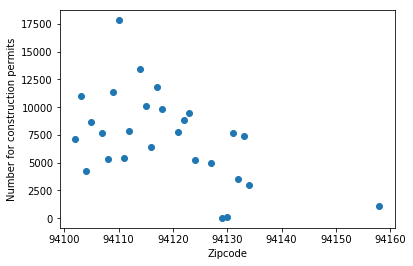

Zipcode  count
0  94110.0  17837
1  94114.0  13404
2  94117.0  11780
3  94109.0  11348
4  94103.0  10986

In [6]:
g=df_permits_col.Zipcode.value_counts()
g=pd.DataFrame(g)
s=pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["Zipcode","count"]
g.Zipcode.drop_duplicates()
x = g["Zipcode"]
y = g["count"]
g.head()

# x = [2,3,4,5,7,9,13,15,17]
# y = [2,3,4,5,7,9,13,15,17]
plt.scatter(x,y)
plt.ylabel('Number for construction permits')
plt.xlabel('Zipcode')
plt.show()
g.head()

/home/neil/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/neil/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/neil/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

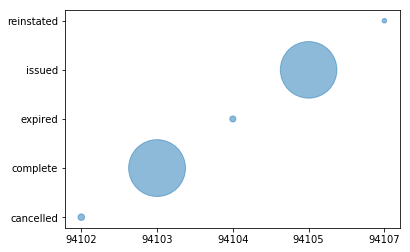

Zipcode  Current_Status
94102.0  cancelled           43
         complete          3231
         expired             37
         issued            3203
         reinstated          20
Name: Delay_Time, dtype: int64

In [7]:
df_permits_col['Issued_Date']= pd.to_datetime((df_permits_col['Issued_Date']), format="%m/%d/%Y")
df_permits_col['Filed_Date']= pd.to_datetime((df_permits_col['Filed_Date']), format="%m/%d/%Y")
df_permits_col['Delay_Time'] = df_permits_col['Issued_Date'].sub(df_permits_col['Filed_Date'], axis=0)
df_permits_col['Delay_Time'] = df_permits_col['Delay_Time'] / np.timedelta64(1, 'D')
df_permits_col = df_permits_col[np.isfinite(df_permits_col['Delay_Time'])]
result=df_permits_col.groupby(['Zipcode', 'Current_Status'])['Delay_Time'].count()

x=['94102','94103','94104','94105','94107']
y=['cancelled','complete','expired','issued','reinstated']
z=result.values
plt.scatter(x, y, s=z, alpha=0.5)
plt.show()
result.head()

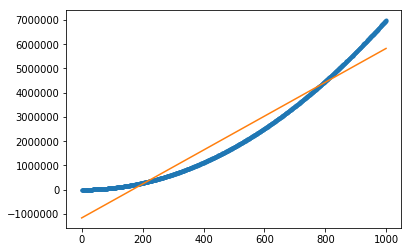

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
x = np.arange(1000)
y = 7*x**2 +3*x+ 10 

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()

In [10]:
def getLabel(input):
    Label = []
    for i in range(len(input)):
        if input.values[i]<90.0:
            Label.append('Quater')
        elif input.values[i]>90.0 and input.values[i]<180.0 :
            Label.append('Half Year')
        elif input.values[i]>180.0 and input.values[i]<366.0 :
            Label.append('One Year')
        else:
            Label.append('More than a Year')
    return Label

In [11]:
df_total_time=df_permits_col['Delay_Time']
Label = getLabel(df_total_time)
df_permits_col['Time_Label']=Label
result_class=df_permits_col.groupby(['Zipcode', 'Time_Label'])['Time_Label'].count()
#print result_class.values

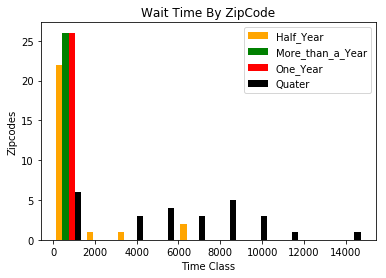

In [12]:
zipList = set()
zipList=df_permits_col['Zipcode']

Half_Year = []
More_than_a_Year = []
One_Year = []
Quater = []

for i in range(0,len(result_class.values),4):
    if(i < len(result_class.values)-4):
        Half_Year.append(result_class.values[i])
        More_than_a_Year.append(result_class.values[i+1])
        One_Year.append(result_class.values[i+2])
        Quater.append(result_class.values[i+3])  

legend = ['Half_Year', 'More_than_a_Year','One_Year','Quater']
plt.hist([Half_Year, More_than_a_Year,One_Year,Quater], color=['orange', 'green','red','black'])
plt.xlabel("Time Class")
plt.ylabel("Zipcodes")
plt.legend(legend)
plt.title('Wait Time By ZipCode')
plt.show()